# 1a

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = pd.read_csv("dataset1.txt", delimiter= '\s+', header=None)

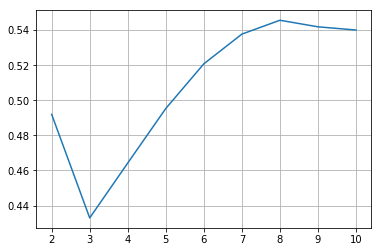

In [3]:
Silhouette = []
Max = 10
for k in range(2, Max+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  Silhouette.append(silhouette_score(x, labels, metric = 'euclidean'))
Pointx = [x for x in range(2,Max+1)]
plt.plot(Pointx, Silhouette)
plt.grid()

### From above graph number of clusters=3

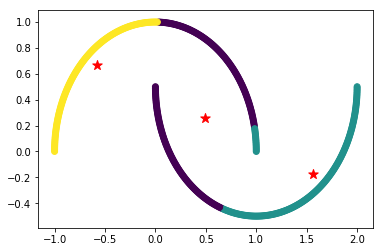

In [4]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(x)
centroids = Kmean.cluster_centers_
label = Kmean.fit_predict(x)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c= label ) 
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100,alpha= 1,marker="*")

# 1B

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
Distance_pairwise = pd.DataFrame(euclidean_distances(x,x)) 
Distance_pairwise

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,2.529635,0.126085,2.508116,1.043383,0.750773,0.656198,2.029558,1.028076,1.679400,...,1.569266,2.533922,2.516408,1.354604,2.348891,1.317505,2.470690,0.511542,2.143445,1.317246
1,2.529635,0.000000,2.429752,0.425691,1.507473,1.832038,1.992205,1.326972,1.912732,1.041161,...,1.037969,0.075683,0.376250,1.791648,0.888818,1.212440,0.584341,2.852914,1.199932,1.808147
2,0.126085,2.429752,0.000000,2.422906,0.933740,0.632415,0.618405,1.986197,1.013452,1.607589,...,1.487977,2.436426,2.429336,1.337571,2.283232,1.220024,2.391741,0.632415,2.093217,1.300949
3,2.508116,0.425691,2.422906,0.000000,1.555070,1.878404,1.909008,0.978068,1.744529,0.866630,...,0.940609,0.351437,0.050462,1.561413,0.487108,1.222999,0.163835,2.764604,0.831873,1.584785
4,1.043383,1.507473,0.933740,1.555070,0.000000,0.326569,0.678935,1.407550,0.908235,0.866143,...,0.691938,1.520552,1.552846,1.083376,1.529144,0.339010,1.556012,1.445091,1.455088,1.063945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.317505,1.212440,1.220024,1.222999,0.339010,0.656303,0.814514,1.119122,0.887329,0.548040,...,0.363851,1.216718,1.223495,0.958097,1.194229,0.000000,1.218190,1.658545,1.146654,0.949672
496,2.470690,0.584341,2.391741,0.163835,1.556012,1.873467,1.853737,0.831873,1.658545,0.800523,...,0.904070,0.511542,0.214075,1.453785,0.326569,1.218190,0.000000,2.700313,0.680087,1.479517
497,0.511542,2.852914,0.632415,2.764604,1.445091,1.199932,0.862056,2.121918,1.080437,1.901332,...,1.834204,2.845905,2.781053,1.379607,2.524157,1.658545,2.700313,0.000000,2.260085,1.342672
498,2.143445,1.199932,2.093217,0.831873,1.455088,1.715805,1.487977,0.163835,1.179650,0.599364,...,0.787457,1.138524,0.877498,0.900103,0.363851,1.146654,0.680087,2.260085,0.000000,0.933740


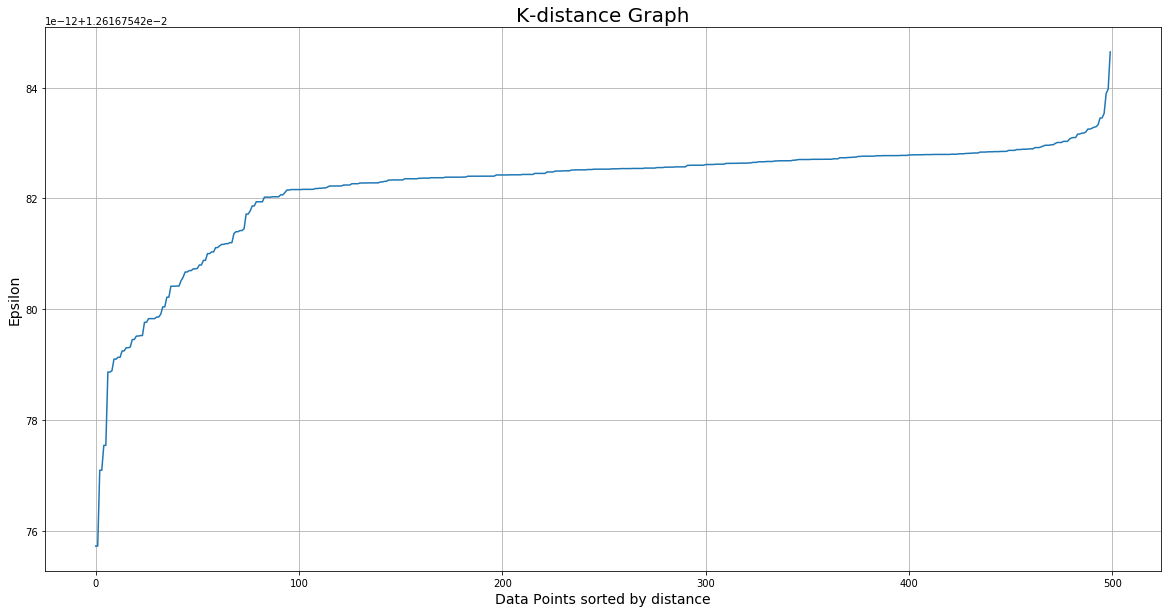

In [6]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neighbor_s = neigh.fit(x[[0,1]])
dists, indices = neighbor_s.kneighbors(x[[0,1]])
dists = np.sort(dists, axis=0)
dists = dists[:,1]
plt.figure(figsize=(20,10))
plt.plot(dists)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()


### From above graph for epsilon value curvature is around (84 * 1e-12+1.26167542e-2)

[1 2]


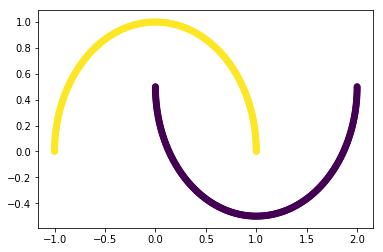

In [7]:
data_points=x.shape[0]
label = [-1]*data_points 
visited = [0]*data_points 

Minimum_points = 3
epsilon =0.14 
cid = 0

for i in range(data_points):
    if visited[i] == 0:
        visited[i] = 1 
        friends = Distance_pairwise[Distance_pairwise[i] <  epsilon].index.tolist() 
        if len(friends) -1 >= epsilon: 
            cid += 1
            label[i] = cid
            for friend in friends:
                if friend != i: 
                    if visited[friend] == 0:
                        visited[friend] = 1
                        commonFriends = Distance_pairwise[Distance_pairwise[friend] <  epsilon].index.tolist() 
                        if len(commonFriends) -1 >= epsilon: 
                            friends.extend(commonFriends)
                        if label[friend] == -1:
                            label[friend] = cid
        else:
            label[i] = 0 
print(np.unique(label))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c= label )

# 1C

(c) What differences do you see between the DBSCAN and k-means methods, and why?

# 1D

In [8]:
p = pd.read_csv("dataset2.txt", delimiter= '\s+', header=None)

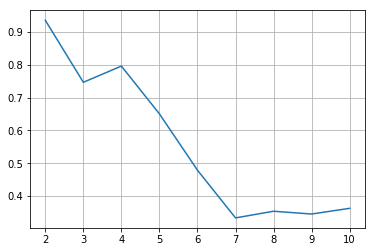

In [9]:
Silhouette = []
Max = 10
for k in range(2, Max+1):
  kmeans = KMeans(n_clusters = k).fit(p)
  labels = kmeans.labels_
  Silhouette.append(silhouette_score(p, labels, metric = 'euclidean'))
Pointx = [x for x in range(2,Max+1)]
plt.plot(Pointx, Silhouette)
plt.grid()

### From above graph number of clusters=3

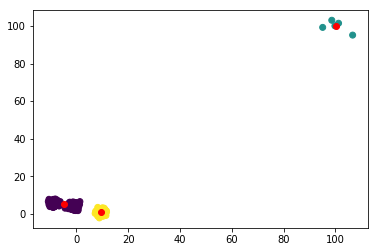

In [10]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(p)
centroids = Kmean.cluster_centers_
label = Kmean.fit_predict(p)
plt.scatter(p.iloc[:, 0], p.iloc[:, 1], c= label ) 
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', alpha= 1)

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
Distance_pairwise = pd.DataFrame(euclidean_distances(p,p)) 
Distance_pairwise

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,11.193583,11.981049,19.162134,16.840769,8.837177,10.841607,1.139272,1.457447,12.347582,...,0.906434,11.886846,17.379170,0.653704,10.494195,134.656595,135.855892,130.907200,136.632577,136.076914
1,11.193583,0.000000,0.802365,8.010645,5.669824,2.738808,0.534664,11.942377,12.270921,1.204214,...,10.304091,1.456485,6.219338,11.453389,0.712429,139.211765,141.018403,135.245910,141.190069,140.413313
2,11.981049,0.802365,0.000000,7.257409,4.911657,3.518795,1.273083,12.716654,13.043179,0.414887,...,11.089143,1.486515,5.466375,12.231907,1.514755,139.417387,141.269151,135.436334,141.395429,140.602371
3,19.162134,8.010645,7.257409,0.000000,2.346687,10.383250,8.325258,19.944386,20.275380,6.939579,...,18.283335,7.322643,1.791568,19.448450,8.689845,143.825585,146.000778,139.736821,145.799867,144.887652
4,16.840769,5.669824,4.911657,2.346687,0.000000,8.102667,5.999164,17.609789,17.939442,4.593258,...,15.957946,5.063995,0.562539,17.117114,6.354823,142.332012,144.407229,138.275975,144.307809,143.432500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,134.656595,139.211765,139.417387,143.825585,142.332012,139.273091,139.409952,133.567949,133.319788,139.398409,...,134.835835,140.668055,142.745906,134.002891,139.022968,0.000000,8.427271,4.795034,1.978751,3.210013
496,135.855892,141.018403,141.269151,146.000778,144.407229,140.918486,141.187097,134.748544,134.485674,141.274467,...,136.089497,142.470813,144.842111,135.203412,140.789542,8.427271,0.000000,12.267375,8.333693,11.277176
497,130.907200,135.245910,135.436334,139.736821,138.275975,135.361774,135.453831,129.826437,129.583911,135.409316,...,131.066489,136.702387,138.682881,130.253672,135.070702,4.795034,12.267375,0.000000,6.517464,5.172392
498,136.632577,141.190069,141.395429,145.799867,144.307809,141.251840,141.388393,135.543666,135.295302,141.376286,...,136.812460,142.646366,144.721409,135.978873,141.001455,1.978751,8.333693,6.517464,0.000000,3.055867


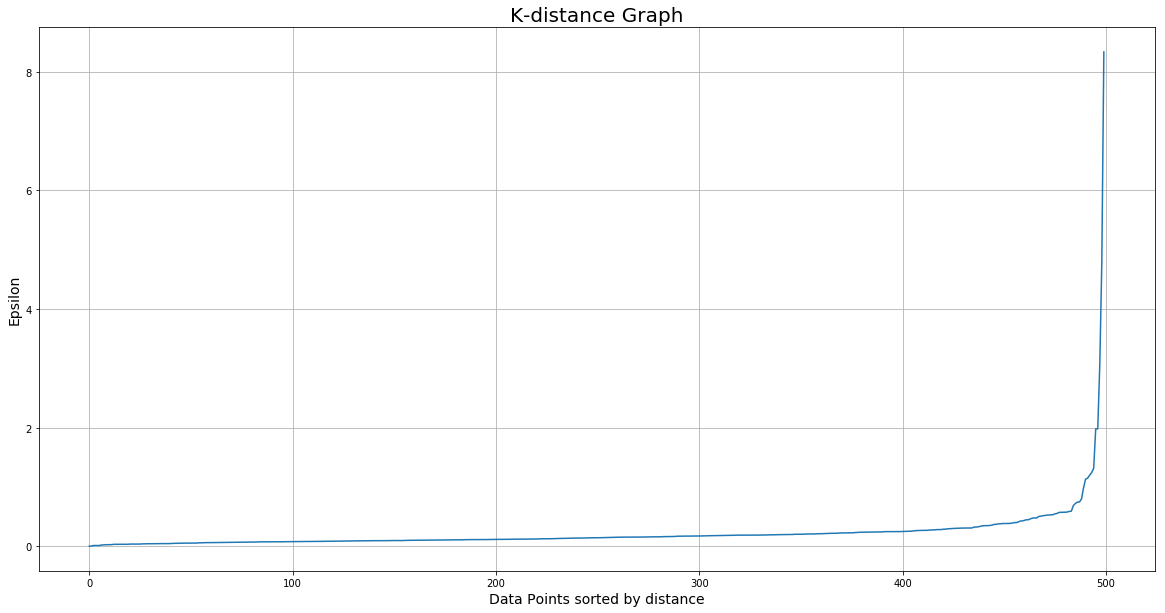

In [13]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neighbor_s = neigh.fit(p[[0,1]])
dists, indices = neighbor_s.kneighbors(p[[0,1]])
dists = np.sort(dists, axis=0)
dists = dists[:,1]
plt.figure(figsize=(20,10))
plt.plot(dists)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()


### From above graph for epsilon value curvature is around 3

[0 1 2]


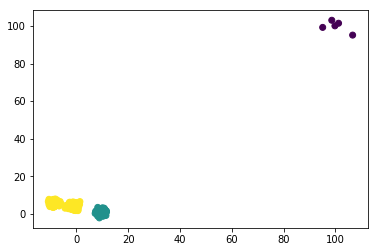

In [14]:
data_points=p.shape[0]
label = [-1]*data_points 
visited = [0]*data_points 

Minimum_points = 3  
epsilon =3
cid = 0

for i in range(data_points):
    if visited[i] == 0:
        visited[i] = 1 
        friends = Distance_pairwise[Distance_pairwise[i] <  epsilon].index.tolist() 
        if len(friends) -1 >= epsilon: 
            cid += 1
            label[i] = cid
            for friend in friends:
                if friend != i: 
                    if visited[friend] == 0:
                        visited[friend] = 1
                        commonFriends = Distance_pairwise[Distance_pairwise[friend] <  epsilon].index.tolist() 
                        if len(commonFriends) -1 >= epsilon: 
                            friends.extend(commonFriends)
                        if label[friend] == -1:
                            label[friend] = cid
        else:
            label[i] = 0 
print(np.unique(label))
plt.scatter(p.iloc[:, 0], p.iloc[:, 1], c= label )

 According to my observation both KMEANS and DBSCAN perform well on dataset2


# DBSCAN

pros
1. It does not need a predefined number of clusters i.e, not require an initial specification of the number of clusters.

2. Basically, clusters can be of any random shape and size, including non-spherical ones.

3. It is able to identify noise data, popularly known as outliers.

cons

1. DBSCAN clustering will fail when there are no density drops between clusters.

2. It seems to be difficult to detect outlier or noisy points if there is a variation in the density of the clusters.

3. It is sensitive to parameters i.e. it’s hard to determine the correct set of parameters.




# KMEANS

pros
1.  Easy to implement k-means and identify unknown groups of data from complex data sets. 
2.  K-means algorithm can easily adjust to the changes. If there are any problems, adjusting the cluster segment will allow changes to easily occur on the algorithm.

3. K-means is suitable for a large number of datasets and it’s computed much faster than the smaller dataset. It can also produce higher clusters.

4. The algorithm used is good at segmenting the large data set. Its efficiency depends on the shape of the clusters. K-means works well in hyper-spherical clusters.

cons
1. K-means doesn’t allow the formation of an optimal set of clusters and for effective results, it is not possible to decide clusters before
2. K-means clustering gives varying results on different runs of an algorithm. A random choice of cluster patterns yields different clustering results resulting in inconsistency.

3. It produces clusters with uniform sizes even when the input data has different sizes.

4. The way in which data is ordered in building the algorithm Effects the final results of the data set
    
    